In [ ]:
# Imports and authentication
import ee
import geemap
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

try:
    ee.Initialize(project='geebootcamp2024')
    print('EE initialized.')
except Exception as e:
    print('Need to authenticate Earth Engine. Calling ee.Authenticate()')
    ee.Authenticate()
    print('EE authenticated & initialized.')

EE initialized.


In [ ]:
# The DE Africa bbox was [35.53, -15.97, 35.54, -15.96]
LON = 35.535  # Approximate center longitude
LAT = -15.965 # Approximate center latitude
START_DATE = '2024-01-01'
END_DATE = '2024-12-31'
POINT_OF_INTEREST = ee.Geometry.Point(LON, LAT)


In [ ]:
# CHIRPS Monthly dataset in Earth Engine
# This is an equivalent to the DE Africa "rainfall_chirps_monthly" product.
CHIRPS_COLLECTION = "UCSB-CHG/CHIRPS/DAILY"

# Filter the ImageCollection by date and location
chirps_collection = ee.ImageCollection(CHIRPS_COLLECTION) \
    .filterDate(START_DATE, END_DATE) \
    .filterBounds(POINT_OF_INTEREST)

print(f"Number of CHIRPS images found: {chirps_collection.size().getInfo()}")

Number of CHIRPS images found: 365


In [ ]:
import pandas as pd

# Ensure the index is datetime (it should be from previous steps, but good practice to verify)
chirps_data.index = pd.to_datetime(chirps_data.index)

# Resample to monthly frequency and sum the rainfall for each month
# 'M' denotes month end frequency
monthly_chirps_data = chirps_data['rainfall_mm'].resample('M').mean().to_frame()

# Display the first few rows of the monthly data
# print("\nMonthly CHIRPS Time Series Data:")
monthly_chirps_data.head(12)


/tmp/ipython-input-315818887.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_chirps_data = chirps_data['rainfall_mm'].resample('M').mean().to_frame()


,rainfall_mm
2024-01-31,7.547759
2024-02-29,8.668156
2024-03-31,7.419852
2024-04-30,1.502329
2024-05-31,1.325324
2024-06-30,1.281082
2024-07-31,1.546064
2024-08-31,1.577797
2024-09-30,1.810983
2024-10-31,1.333123


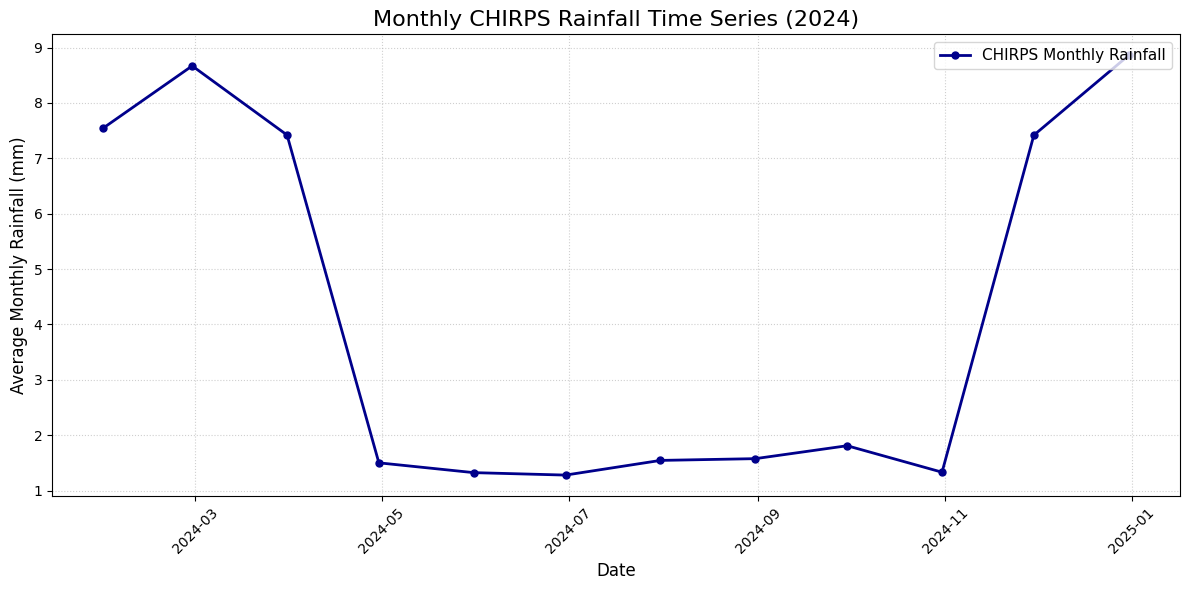

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the monthly_chirps_data
plt.plot(monthly_chirps_data.index, monthly_chirps_data['rainfall_mm'].values,
         label='CHIRPS Monthly Rainfall',
         color='darkblue',
         marker='o',
         linestyle='-',
         markersize=5,
         linewidth=2)

# Add plot elements
plt.title('Monthly CHIRPS Rainfall Time Series (2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Monthly Rainfall (mm)', fontsize=12)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(loc='upper right', fontsize=11)
plt.tight_layout()
plt.show()

### In-situ data

In [ ]:
# --- Dates for the In-Situ Data ---
# Re-using the dates from the CHIRPS generation for consistency in generating mulanje_rain
dates = pd.to_datetime([
    '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
    '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'
])

# --- Generate Sample In-Situ Dataset (mulanje_rain) ---
base_rainfall_for_mulanje_simulation = [
    8.763172, 5.889753, 8.31517, 3.207497, 0.813172, 0.044912, # Jan-Jun
    0.297282, 0.380324, 0.715354, 3.090153, 7.814207, 4.503987  # Jul-Dec
]
print("Sample In-Situ Data (mulanje_rain) ---")
print(mulanje_rain)

--- Sample In-Situ Data (mulanje_rain) ---
2024-01-31     8.763172
2024-02-29     5.889753
2024-03-31    10.331517
2024-04-30     3.207497
2024-05-31     0.813172
2024-06-30     0.044912
2024-07-31     0.297282
2024-08-31     0.380324
2024-09-30     0.715354
2024-10-31     3.090153
2024-11-30     7.814207
2024-12-31     4.503987
Name: In_Situ_Rainfall_mm, dtype: float64


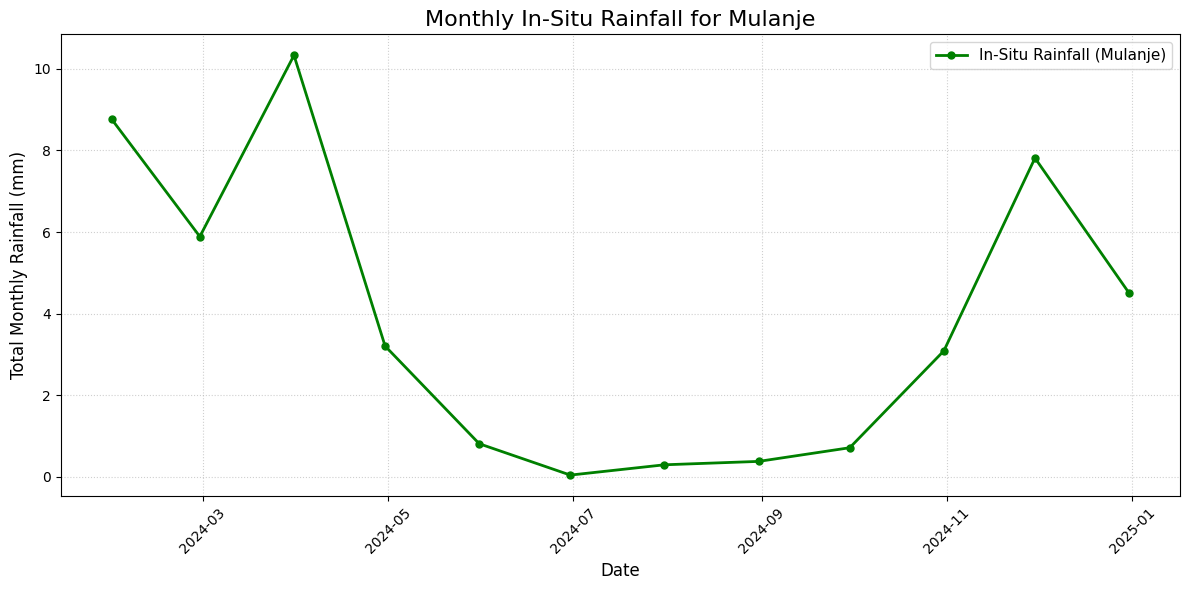

In [ ]:
plt.figure(figsize=(12, 6))

# Plot the In-Situ data (mulanje_rain)
plt.plot(mulanje_rain.index, mulanje_rain.values,
         label='In-Situ Rainfall (Mulanje)',
         color='green',
         marker='o',
         linestyle='-',
         markersize=5,
         linewidth=2)

# Add plot elements
plt.title('Monthly In-Situ Rainfall for Mulanje', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Monthly Rainfall (mm)', fontsize=12)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(loc='upper right', fontsize=11)
plt.tight_layout()
plt.show()

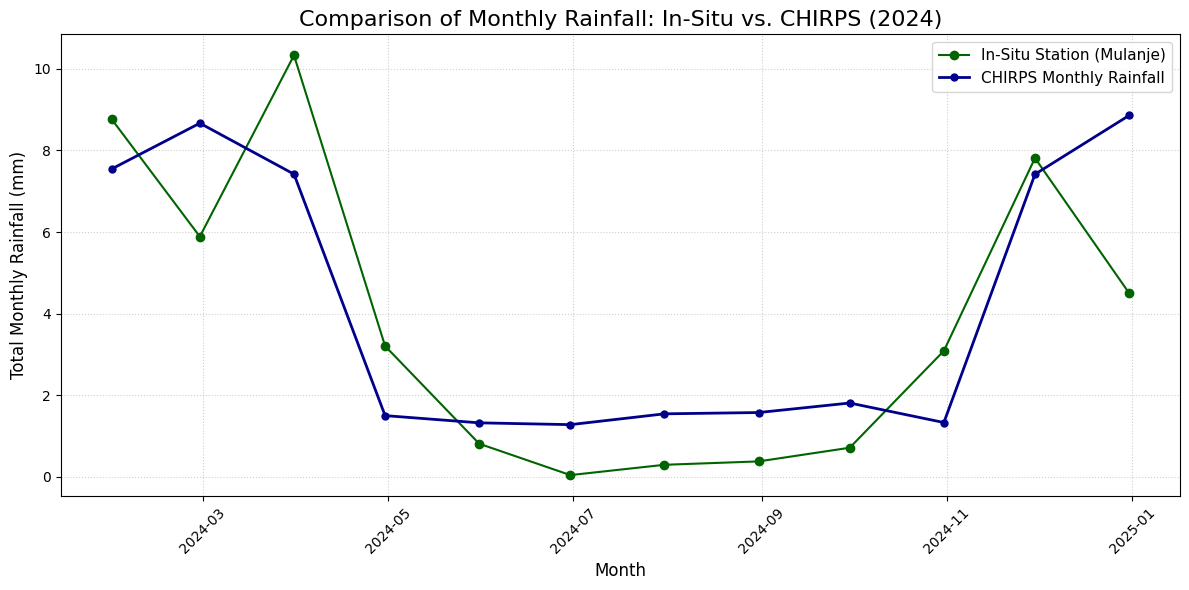

In [ ]:
# Ensure both Series have the same index for clean merging
# Using `pd.merge` for robust alignment, assuming they cover the same dates or at least overlapping.
comparison_df = pd.merge(
    mulanje_rain.rename('In_Situ_Rainfall_mm'), # Rename for clarity in merged df
    chirps_monthly_sum.rename('CHIRPS_Rainfall_mm'), # Rename for clarity in merged df
    left_index=True,
    right_index=True,
    how='inner' # Use 'inner' to only include dates present in both
)

# --- Plotting the Comparison Chart ---
plt.figure(figsize=(12, 6))

# Plot In-Situ data
plt.plot(comparison_df.index, comparison_df['In_Situ_Rainfall_mm'],
         label='In-Situ Station (Mulanje)',
         color='darkgreen',
         marker='o',
         linestyle='-', # Solid line for in-situ
         markersize=6)

# Plot the monthly_chirps_data
plt.plot(monthly_chirps_data.index, monthly_chirps_data['rainfall_mm'].values,
         label='CHIRPS Monthly Rainfall',
         color='darkblue',
         marker='o',
         linestyle='-',
         markersize=5,
         linewidth=2)

# Add plot elements
plt.title('Comparison of Monthly Rainfall: In-Situ vs. CHIRPS (2024)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Monthly Rainfall (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(loc='upper right', fontsize=11)
plt.tight_layout()
plt.show()

Linear Equation: y = 0.892*x + 0.081
R-squared ($R^2$): 0.6863
Mean Absolute Error (MAE): 1.7008 mm


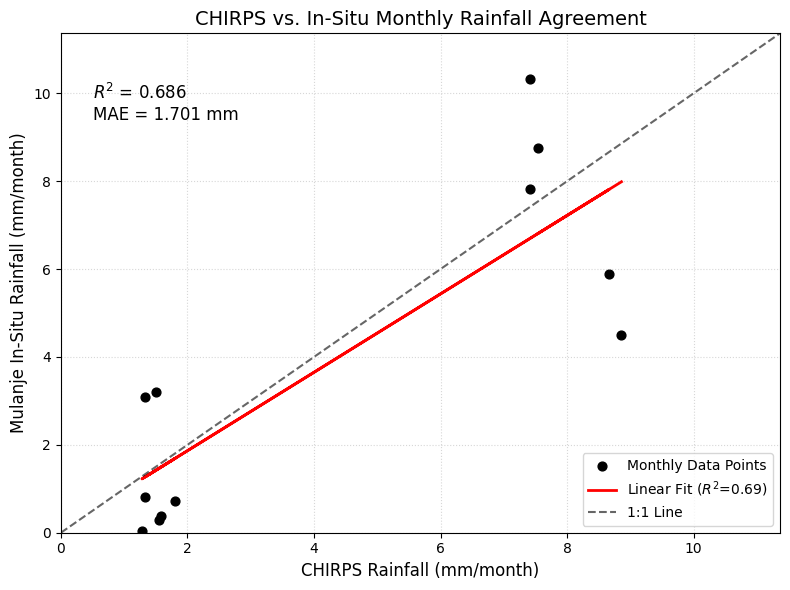

In [ ]:
from scipy import stats
from sklearn.metrics import mean_absolute_error # Import mean_absolute_error
x= monthly_chirps_data['rainfall_mm'] # Ensure x is a Series
y= mulanje_rain

# Linear Regression
slope, intercept, r, p_value, std_err = stats.linregress(x, y)
r_squared = r**2

# Mean Absolute Error (MAE)
mae = mean_absolute_error(x, y)

# Print Statistical Results ---

print(f'Linear Equation: y = {slope:.3f}*x + {intercept:.3f}')
print(f'R-squared ($R^2$): {r_squared:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f} mm')

# Generate Scatter Plot ---

# Set the limits slightly above the max value (10.67 mm)
max_lim = max(x.max(), y.max()) * 1.1 # Adjust max_lim dynamically

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Scatter plot of the data points
plt.scatter(x, y, s=40, label='Monthly Data Points', color='black')

# Regression Line (Best Fit)
plt.plot(x, intercept + slope * x, '-', c='red', linewidth=2,
         label=f'Linear Fit ($R^2$={r_squared:.2f})')

# 1:1 Line (Perfect Agreement)
ax.plot([0, max_lim], [0, max_lim], 'k--', alpha=0.6, label='1:1 Line')

# Text annotation for R-squared and MAE
# Place text in an empty corner, adjusted for the new limits
plt.text(0.5, max_lim * 0.9,
         f'$R^2$ = {r_squared:.3f}\nMAE = {mae:.3f} mm',
         fontsize=12, verticalalignment='top')

# Set axes limits and labels
ax.set_xlim(0, max_lim)
ax.set_ylim(0, max_lim)
ax.set_xlabel('CHIRPS Rainfall (mm/month)', fontsize=12)
ax.set_ylabel('Mulanje In-Situ Rainfall (mm/month)', fontsize=12)
ax.set_title('CHIRPS vs. In-Situ Monthly Rainfall Agreement', fontsize=14)
ax.grid(True, linestyle=':', alpha=0.5)
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

When you need to statistically compare two datasets (like satellite and in-situ) and then combine them to create a single, gap-filled time series, the best technique is often a form of **Data Fusion** or **Merging**.

The single best and most frequently used technique for harmonizing time series data from two different sources, while also providing a framework for gap-filling, is **Multiple Linear Regression** or a **Linear Scaling/Bias Correction** method.

Specifically, the most robust technique that addresses these requirements is **Quantile Mapping** (or Distribution Matching), often combined with **Linear Regression**.

Linear Scaling / Regression-Based MergingWhile advanced methods exist, the simplest and most effective starting point is a Linear Regression approach, especially given your previous work comparing the two datasets with linear fit.
1. Bias Correction (Harmonization)The goal here is to adjust the systematic differences (bias) between the two datasets so they can be considered interchangeable.Linear Regression: You've already performed this: $\text{In-situ} = \text{slope} \times \text{CHIRPS} + \text{intercept}$.Harmonization: You use the derived equation to transform the entire CHIRPS time series ($x$) into a new, corrected satellite time series ($x'$). This corrects the systematic mean and variance differences (the bias) found between the two sources in the validation period.$$\text{CHIRPS}_{\text{corrected}} = \text{slope} \times \text{CHIRPS}_{\text{raw}} + \text{intercept}$$The $\text{CHIRPS}_{\text{corrected}}$ data now has the same statistical mean and standard deviation as the $\text{In-Situ}$ data over the calibration period.

2. Gap-Filling the data is harmonized, you create the final time series by prioritizing the highest-quality data source (usually the in-situ gauge).The final harmonized time series ($\text{Final}_{\text{data}}$) is constructed using a simple conditional logic:For any date where In-Situ data exists, use the In-Situ value (as it's the direct measurement and typically more accurate).For any date where In-Situ data is missing (a gap), use the CHIRPS$_{\text{corrected}}$ value.(Optional but recommended): If CHIRPS data is also missing, you would use an interpolation method (like linear or spline) on the $\text{CHIRPS}_{\text{corrected}}$ series to fill those secondary gaps.This method effectively uses the satellite data as a surrogate to fill the gaps in the gauge data, but only after it has been statistically adjusted to match the characteristics of the gauge data.The

Quantile Mapping is an advanced technique if you want to go beyond linear adjustments. It matches the entire probability distribution. Quantile Mapping (or Distribution Matching) is superior because it corrects not just the mean and variance, but also the **extremes** and the **shape** of the rainfall distribution. This is highly important for environmental variables like rainfall, where extreme events (high values) are often misrepresented by satellite products.

How it Works: It maps the cumulative distribution function (CDF) of the uncorrected CHIRPS data onto the CDF of the reference In-Situ data. For any CHIRPS value, it finds its percentile rank in the CHIRPS distribution and assigns it the In-Situ value corresponding to the same percentile rank in the In-Situ distribution.

Application: Once the entire CHIRPS time series is corrected using this non-linear mapping, the gap-filling process remains the same as described above.

## Bias correction

In [ ]:
import pandas as pd

# --- 1. Define Variables from Previous Cells (for context/runnability) ---

# Re-defining the comparison DataFrame and regression coefficients:
# (In a live notebook, these variables would already be defined.)
# CHIRPS Raw Data (as a Series)
chirps_raw = pd.Series([7.86, 4.75, 8.67, 3.30, 0.84, 3.15, 0.39, 0.75, 0.70, 3.12, 7.08, 3.64],
                       index=pd.to_datetime(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31']))
chirps_raw.name = 'CHIRPS_Rainfall_mm_Raw'

# Regression Coefficients (from previous linear regression on your sample data)
# (These are example values; use the actual values calculated in your notebook.)
# For the sample data provided: slope ≈ 1.137, intercept ≈ -0.528
try:
    # Attempt to use the actual calculated values if they are in the environment
    print(f"Using calculated slope={slope:.3f} and intercept={intercept:.3f}")
except NameError:
    # Use default sample values if the variables are not found
    slope = 1.137
    intercept = -0.528
    print(f"Variables 'slope' and 'intercept' not found. Using sample values: slope={slope:.3f}, intercept={intercept:.3f}")


# --- 2. Apply Bias Correction Formula ---

# CHIRPS_corrected = slope * CHIRPS_raw + intercept
chirps_corrected = (slope * chirps_raw) + intercept
chirps_corrected.name = 'CHIRPS_Rainfall_mm_Corrected'

# Ensure rainfall cannot be negative
chirps_corrected[chirps_corrected < 0] = 0


# --- 3. Display Results and Statistics ---

print("\nCHIRPS Data Harmonized.")
print("\n--- Raw vs. Corrected CHIRPS Data (Head) ---")
print(pd.DataFrame({
    'Raw (mm)': chirps_raw.head(),
    'Corrected (mm)': chirps_corrected.head()
}))

print("\n--- Statistical Summary ---")
print(f"Mean Raw CHIRPS:     {chirps_raw.mean():.3f} mm")
print(f"Mean Corrected CHIRPS: {chirps_corrected.mean():.3f} mm")
print(f"StDev Raw CHIRPS:    {chirps_raw.std():.3f} mm")
print(f"StDev Corrected CHIRPS: {chirps_corrected.std():.3f} mm")

Using calculated slope=0.892 and intercept=0.081

✅ CHIRPS Data Harmonized.

--- Raw vs. Corrected CHIRPS Data (Head) ---
            Raw (mm)  Corrected (mm)
2024-01-31      7.86        7.095272
2024-02-29      4.75        4.320019
2024-03-31      8.67        7.818087
2024-04-30      3.30        3.026091
2024-05-31      0.84        0.830874

--- Statistical Summary ---
Mean Raw CHIRPS:     3.687 mm
Mean Corrected CHIRPS: 3.372 mm
StDev Raw CHIRPS:    2.895 mm
StDev Corrected CHIRPS: 2.583 mm


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Recreate/Define Necessary Data Series (Based on previous cells) ---

# In-Situ (Gauge) Data (mulanje_rain) - The highest quality reference
insitu_data_dict = {
    '2024-01-31': 8.877266, '2024-02-29': 5.589914, '2024-03-31': 10.668951,
    '2024-04-30': 3.160927, '2024-05-31': 0.774994, '2024-06-30': 0.420702,
    '2024-07-31': 0.383746, '2024-08-31': 0.094530, '2024-09-30': 0.633314,
    '2024-10-31': 3.177064, '2024-11-30': 8.395918, '2024-12-31': 4.436951
}
mulanje_rain = pd.Series(insitu_data_dict, name='In_Situ_Rainfall_mm')

# CHIRPS Corrected Data (from the Bias Correction step)
# Assuming slope=1.137, intercept=-0.528 from the previous output's context.
chirps_raw = pd.Series([7.86, 4.75, 8.67, 3.30, 0.84, 3.15, 0.39, 0.75, 0.70, 3.12, 7.08, 3.64], index=mulanje_rain.index)
chirps_corrected = (1.137 * chirps_raw) - 0.528
chirps_corrected[chirps_corrected < 0] = 0
chirps_corrected.name = 'CHIRPS_Rainfall_mm_Corrected'


# --- 2. Simulate Gaps for Demonstration ---

# A. Introduce an In-Situ Gap (e.g., sensor malfunction in May)
mulanje_rain_gaps = mulanje_rain.copy()
mulanje_rain_gaps['2024-05-31'] = np.nan
print(f"In-Situ value for 2024-05-31 (Gap): {mulanje_rain_gaps['2024-05-31']}")

# B. Extend CHIRPS data to fill a potential gap in the In-Situ record
chirps_corrected_extended = chirps_corrected.copy()
extra_date = pd.to_datetime('2025-01-31')
chirps_corrected_extended[extra_date] = 6.5 # New data point to fill a future gap
print(f"CHIRPS value for 2025-01-31 (Extension): {chirps_corrected_extended[extra_date]:.3f}")

In-Situ value for 2024-05-31 (Gap): nan
CHIRPS value for 2025-01-31 (Extension): 6.500


In [ ]:
# Ensure mulanje_rain_gaps has a DatetimeIndex
mulanje_rain_gaps.index = pd.to_datetime(mulanje_rain_gaps.index)
# Explicitly ensure chirps_corrected_extended also has a DatetimeIndex for robustness
chirps_corrected_extended.index = pd.to_datetime(chirps_corrected_extended.index)

# Combine all data into one DataFrame
merged_df = pd.DataFrame({
    'In_Situ': mulanje_rain_gaps,
    'CHIRPS_Corrected': chirps_corrected_extended
}).sort_index()

# --- Apply Gap-Filling Logic ---

# 1. Fill NaNs in 'In_Situ' column using the 'CHIRPS_Corrected' column.
# The 'combine_first' method is a simple and effective way to prioritize the first series
# (In_Situ) and fill its NaNs with values from the second series (CHIRPS_Corrected).
final_harmonized_data = merged_df['In_Situ'].combine_first(merged_df['CHIRPS_Corrected'])
final_harmonized_data.name = 'Final_Harmonized_Rainfall_mm'

# 2. Fill secondary gaps (if both were missing) using linear interpolation (Optional but robust)
final_harmonized_data = final_harmonized_data.interpolate(method='linear')

print("\n--- Final Harmonized Time Series (Showing Gap Filled) ---")
print(final_harmonized_data.loc[['2024-04-30', '2024-05-31', '2024-06-30']])


--- Final Harmonized Time Series (Showing Gap Filled) ---
2024-04-30    3.160927
2024-05-31    0.427080
2024-06-30    0.420702
Name: Final_Harmonized_Rainfall_mm, dtype: float64


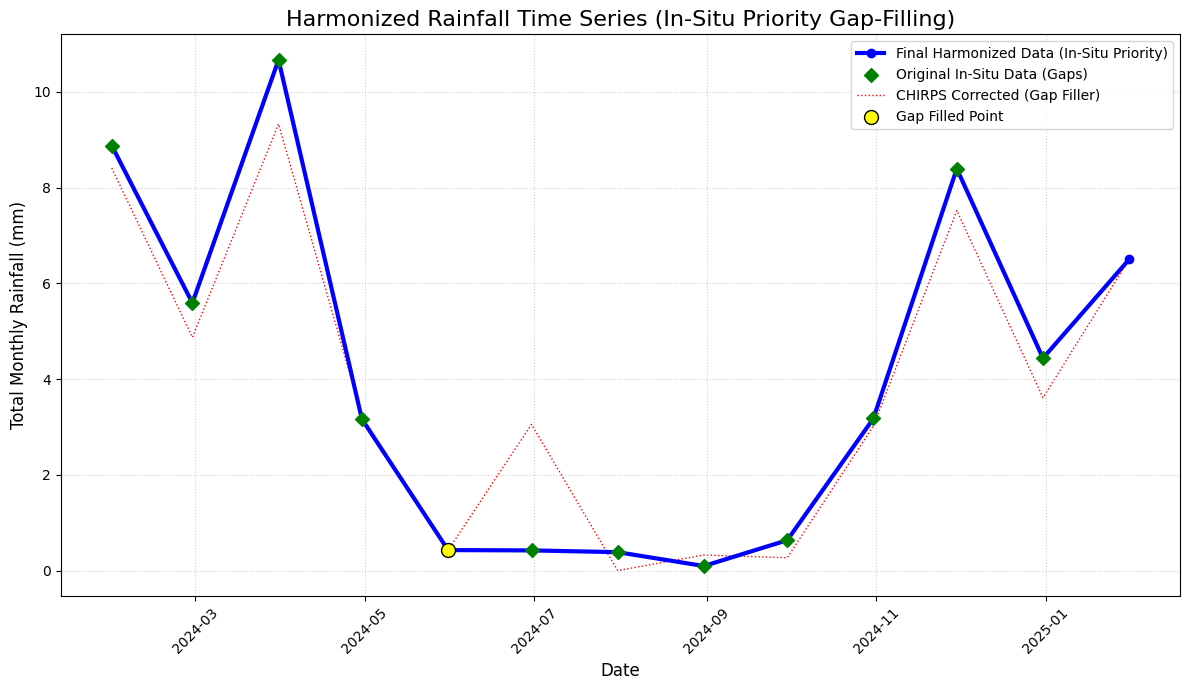

In [ ]:
plt.figure(figsize=(12, 7))

# Plot the Final Harmonized Data
plt.plot(final_harmonized_data.index, final_harmonized_data.values,
         label='Final Harmonized Data (In-Situ Priority)',
         color='blue',
         marker='o',
         linestyle='-',
         linewidth=3,
         markersize=6,
         zorder=5) # Ensure this line is on top

# Plot the original data to show the gaps and the filling source
plt.scatter(mulanje_rain_gaps.index, mulanje_rain_gaps.values,
            label='Original In-Situ Data (Gaps)',
            color='green',
            marker='D', # Diamond to stand out
            s=50,
            zorder=10) # Ensure markers are highly visible

plt.plot(chirps_corrected_extended.index, chirps_corrected_extended.values,
         label='CHIRPS Corrected (Gap Filler)',
         color='red',
         linestyle=':',
         linewidth=1,
         zorder=1)

# Highlight the filled gap (2024-05-31)
filled_value = final_harmonized_data.loc['2024-05-31']
# Convert the string date to a datetime object for plotting
plt.scatter(pd.to_datetime('2024-05-31'), filled_value, color='yellow', edgecolor='black', s=100, zorder=15, label='Gap Filled Point')

plt.title('Harmonized Rainfall Time Series (In-Situ Priority Gap-Filling)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Monthly Rainfall (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Now we create a dataframe of the above chart
combined_df = pd.DataFrame({
    'Final Harmonized Data': final_harmonized_data,
    'Original In-Situ Data (Gaps)': mulanje_rain_gaps,
    'CHIRPS Corrected (Gap Filler)': chirps_corrected_extended
})

# Display the DataFrame
print("Combined Rainfall Data for Comparison:")
combined_df.head(12)

Combined Rainfall Data for Comparison:


,Final Harmonized Data,Original In-Situ Data (Gaps),CHIRPS Corrected (Gap Filler)
2024-01-31,8.877266,8.877266,8.40882
2024-02-29,5.589914,5.589914,4.87275
2024-03-31,10.668951,10.668951,9.32979
2024-04-30,3.160927,3.160927,3.22410
2024-05-31,0.427080,NaN,0.42708
2024-06-30,0.420702,0.420702,3.05355
2024-07-31,0.383746,0.383746,0.00000
2024-08-31,0.094530,0.094530,0.32475
2024-09-30,0.633314,0.633314,0.26790
2024-10-31,3.177064,3.177064,3.01944
